### Calculate Combined Standard Deviation of a portfolio
*Author: Lim Chin En*

*Updated Date: 27/02/2022*

<br>

Standard Deviation is one of the most commonly used measure for a stock's volatility. It measures how widely the stock price dispersed from the mean stock price. If prices trade in a narrow trading range, the standard deviation will return a low value that indicates low volatility. Conversely, if prices swing wildly up and down, then standard deviation returns a high value that indicates high volatility.

<br>

A combined standard deviation of multiple stocks can be calculated with the following expression. Portfolio standard deviation looks at the covariance or correlation coefficients for the securities in a portfolio. Generally, a lower correlation between securities in a portfolio results in a lower portfolio standard deviation. 

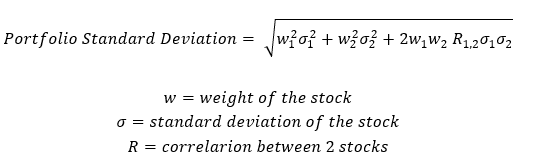

<br>

Portfolio variance is calculated by multiplying the squared weight of each security by its corresponding variance and adding twice the weighted average weight multiplied by the covariance of all individual security pairs. While standard deviation is the square root of the variance.

<br>

The difficulty of calculating portfolio standard deviation is the number of terms increased exponentially with the size of portfolio, especially the second term where we need to calculate the correlation for every combination of the stock. If N is the number of stocks in a portfolio, the number of first term is equal to N in the portfolio while the number of the second term:  is $NC_{2}$. It is a tedious process to calculate every single stock's standard deviation and correlation if the portfolio size is big.

<br>

This code aims to automate the calculation process using python and data analytic techniques fast within minutes.  

<br>

*Disclaimer: All investment strategies and investments involve risk of loss.  Nothing in this project constitutes professional and/or financial advice.*


In [92]:
import os
import numpy as np
import pandas as pd
import yfinance as yf
from datetime import datetime
from datetime import date

First, we import the portfolio's position data. Some brokers allows the user to download their position data in excel or csv from the broker's website. We can then import these data into python as a dataframe. 

In [93]:
df_portfolio = pd.read_csv('Positions 29112021.csv')
df_portfolio

,Actions,Symbol,Name,Qty@Price,Available QTY,Cost,Market Value,% Chg,P/L,Today's P/L,Today's Turnover,Today's Purchase@Avg Price,Today's Sales@Avg Price,Margin Rate
0,NaN,AAPL,Apple,5@156.81,5,143.832,784.05,+9.02%,64.89,0.0,0.0,0@0.00,0@0.00,NaN
1,NaN,ADBE,Adobe,1@662.10,1,629.160,662.10,+5.24%,32.94,0.0,0.0,0@0.00,0@0.00,NaN
2,NaN,CRM,Salesforce,1@284.21,1,272.070,284.21,+4.46%,12.14,0.0,0.0,0@0.00,0@0.00,NaN
3,NaN,FB,Meta Platforms,1@333.12,1,338.500,333.12,-1.59%,-5.38,0.0,0.0,0@0.00,0@0.00,NaN
4,NaN,HPQ,HP Inc,8@34.58,8,28.240,276.64,+22.45%,50.72,0.0,0.0,0@0.00,0@0.00,NaN
5,NaN,ILMN,Illumina,1@369.79,1,389.740,369.79,-5.12%,-19.95,0.0,0.0,0@0.00,0@0.00,NaN
6,NaN,MS,Morgan Stanley,5@97.93,5,97.750,489.65,+0.18%,0.90,0.0,0.0,0@0.00,0@0.00,NaN
7,NaN,MSFT,Microsoft,2@329.68,2,295.060,659.36,+11.73%,69.24,0.0,0.0,0@0.00,0@0.00,NaN
8,NaN,PFE,Pfizer,7@54.00,7,42.950,378.00,+25.73%,77.35,0.0,0.0,0@0.00,0@0.00,NaN
9,NaN,SPY,SPDR S&P 500 ETF,1@458.97,1,435.600,458.97,+5.37%,23.37,0.0,0.0,0@0.00,0@0.00,NaN


The dataframe above shown the key information required for us to calculate the standard deviation of a portfolio. Noticed that the 'Market Value' column shows the stock price when the csv file was downloaded from the broker's website. It may be outdated when the analysis has been made. Therefore we need to update the stock price of each stock to its latest.

<br>

We will use the yfinance library to extract the stock price data. The following code creates a new dataframe with information that we require.

https://pypi.org/project/yfinance/

In [94]:
#Extract Nessasary Column Data
df_stock = df_portfolio[['Name','Symbol','Available QTY']]

market_value_list = []

for indexes in df_stock.index:
    tickerSymbol = df_stock['Symbol'][indexes]
    tickerData = yf.Ticker(tickerSymbol)
    
    stock_history = tickerData.history(period='1d')
    market_value_updated = stock_history['Close'][0]
    market_value_list.append(market_value_updated)

#create a new column with updated market value 
df_stock.loc[:,'Market Value per Share (Updated)'] = market_value_list
df_stock.loc[:,'Market Value (Updated)'] = df_stock['Market Value per Share (Updated)']*df_stock['Available QTY']

#create a new column that calculated the weighting of the stocks
total_market_value = df_stock['Market Value (Updated)'].sum()

df_stock.loc[:,'Weightage'] = df_stock['Market Value (Updated)']/total_market_value
df_stock

C:\Users\Acer\anaconda3\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


,Name,Symbol,Available QTY,Market Value per Share (Updated),Market Value (Updated),Weightage
0,Apple,AAPL,5,163.940002,819.700012,0.167901
1,Adobe,ADBE,1,466.100006,466.100006,0.095472
2,Salesforce,CRM,1,209.854996,209.854996,0.042985
3,Meta Platforms,FB,1,207.029999,207.029999,0.042406
4,HP Inc,HPQ,8,34.195000,273.559998,0.056034
5,Illumina,ILMN,1,330.299988,330.299988,0.067656
6,Morgan Stanley,MS,5,87.419998,437.099991,0.089532
7,Microsoft,MSFT,2,295.670013,591.340027,0.121126
8,Pfizer,PFE,7,46.220001,323.540009,0.066272
9,SPDR S&P 500 ETF,SPY,1,431.070007,431.070007,0.088297


Next, we calculate the standard deviation for each stock. The following codes download the stock data from yahoo finance, and calculates the standard deviation automatically.

There are 2 steps in this code. First, we create a function that returns the standanrd deviation:

In [95]:
def describe_stock(tickerSymbol, start_date, end_date, stock_period = '1d'):
    """This function return the standard deviation, overall return and dividiend paid"""
    
    tickerData = yf.Ticker(tickerSymbol)
    stock = tickerData.history(period=stock_period, start=start_date, end=date.today())

    #assign a new column name as a string
    new_column_name = '%Change_stock ' + tickerSymbol

    #create a new claculated field that 
    stock[new_column_name]= stock['Close'].pct_change()

    #calculate standard deviation
    standard_deviation = stock[new_column_name].std()
    
    return standard_deviation

Next, we create a for loop to loop through all the ticker symbols, and return the standard deviation as a list. Then, we append the list onto the df_stock dataframe.

We will use the stock data from 1st Jan 2021 to 27th Feb 2022, with daily interval

In [96]:
#define the duration
start_date = '2021-1-1'
end_date = date.today()
interval = '1d'

#Create empty list
sd_list = []

#Perform a for loop
for tickerSymbol in df_stock['Symbol']:
    standard_deviation = describe_stock(tickerSymbol, start_date, end_date, stock_period = '1d')
    sd_list.append(standard_deviation)

#Output summary as a Dataframe

df_stock.loc[:,'Standard_Deviation'] = sd_list
df_stock

C:\Users\Acer\anaconda3\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


,Name,Symbol,Available QTY,Market Value per Share (Updated),Market Value (Updated),Weightage,Standard_Deviation
0,Apple,AAPL,5,163.940002,819.700012,0.167901,0.016213
1,Adobe,ADBE,1,466.100006,466.100006,0.095472,0.020076
2,Salesforce,CRM,1,209.854996,209.854996,0.042985,0.019935
3,Meta Platforms,FB,1,207.029999,207.029999,0.042406,0.024953
4,HP Inc,HPQ,8,34.195000,273.559998,0.056034,0.019316
5,Illumina,ILMN,1,330.299988,330.299988,0.067656,0.024502
6,Morgan Stanley,MS,5,87.419998,437.099991,0.089532,0.017504
7,Microsoft,MSFT,2,295.670013,591.340027,0.121126,0.014502
8,Pfizer,PFE,7,46.220001,323.540009,0.066272,0.016763
9,SPDR S&P 500 ETF,SPY,1,431.070007,431.070007,0.088297,0.008996


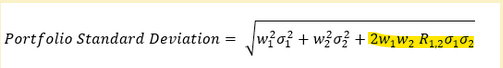

Next, in order to calculate the second term, we need to get all the possible 2 stocks combination.
- The following code returns all possible stock combination without repeatation.
- The number of possible combination is equal to $nC_{2}$, where n = number of stocks
- The output will be a dataframe with all possible combination of stocks

In [97]:
from itertools import combinations_with_replacement

stock_list = []
comb = combinations_with_replacement(df_stock['Symbol'].to_list(), 2)

for i in comb:
    stock_list.append(i)

df_stock_2 = pd.DataFrame(stock_list)

#Rename Column Title
df_stock_2 = df_stock_2.rename(columns={0: 'Stock_A', 1: 'Stock_B'})

#We need to filter out the same Stock A and Stock B
criter1 = df_stock_2["Stock_A"] != df_stock_2["Stock_B"]
df_stock_2 = df_stock_2.iloc[criter1.values,:]

#reset column index
df_stock_2 = df_stock_2.reset_index(drop = True)
df_stock_2.head(5)

,Stock_A,Stock_B
0,AAPL,ADBE
1,AAPL,CRM
2,AAPL,FB
3,AAPL,HPQ
4,AAPL,ILMN


Now, we calculate the correlation between the 2 stocks. Please refer to the following repo for the detail expaination of the below code.

https://github.com/CLIM039/Investigate-Correlation-Between-Stocks-using-Python

In [98]:
stock_list = df_stock['Symbol'].to_list()

# Retrive stock data
tickerSymbol = stock_list[0]
tickerData = yf.Ticker(tickerSymbol)
stock = tickerData.history(period=interval, start=start_date, end=end_date)

#Calculate percentage changes
new_column_name = tickerSymbol
stock[new_column_name]= stock['Close'].pct_change()

#Create a new dataframe with % change only
stock_master = stock[[new_column_name]]

for stock in stock_list[1:]:
    # Retrive stock data
    tickerSymbol = stock
    tickerData = yf.Ticker(tickerSymbol)
    stock = tickerData.history(period=interval, start=start_date, end=end_date)

    #Calculate percentage changes
    new_column_name = tickerSymbol
    stock[new_column_name]= stock['Close'].pct_change()

    #Create a new dataframe with % change only
    stock_change = stock[[new_column_name]]
    
    #Join the newly generated dataframe to the stock_master 
    stock_merged = pd.merge(stock_master, stock_change, left_index=True, right_index=True)
    stock_master = stock_merged

stock_master.head(5)

,AAPL,ADBE,CRM,FB,HPQ,ILMN,MS,MSFT,PFE,SPY,VOO
Date,,,,,,,,,,,
2020-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-04,-0.024719,-0.029553,-0.009976,-0.015449,-0.019520,-0.006054,-0.002918,-0.021266,0.000000,-0.013614,-0.013559
2021-01-05,0.012364,0.000721,0.005492,0.007548,0.014517,0.019415,0.016976,0.000965,0.010323,0.006887,0.006578
2021-01-06,-0.033661,-0.039902,-0.024242,-0.028269,0.020442,0.004401,0.060296,-0.025929,-0.008605,0.005979,0.006066
2021-01-07,0.034123,0.024512,0.008466,0.020622,0.031651,0.015562,0.017101,0.028457,0.005153,0.014858,0.014942


Generate Correlation Matrix

In [99]:
corrMatrix = stock_master.corr(method='pearson')
corrMatrix

,AAPL,ADBE,CRM,FB,HPQ,ILMN,MS,MSFT,PFE,SPY,VOO
AAPL,1.000000,0.624954,0.464618,0.447895,0.344063,0.408983,0.180551,0.684539,0.061008,0.719315,0.719604
ADBE,0.624954,1.000000,0.674911,0.515183,0.203378,0.424639,0.094249,0.756297,-0.100835,0.670692,0.671664
CRM,0.464618,0.674911,1.000000,0.496390,0.096433,0.386218,0.192669,0.610590,-0.109380,0.618467,0.620451
FB,0.447895,0.515183,0.496390,1.000000,0.188516,0.327551,0.170265,0.533865,-0.011054,0.578833,0.578481
HPQ,0.344063,0.203378,0.096433,0.188516,1.000000,0.164838,0.381855,0.272693,0.014266,0.515117,0.512900
ILMN,0.408983,0.424639,0.386218,0.327551,0.164838,1.000000,0.179799,0.393096,0.022497,0.453144,0.452014
MS,0.180551,0.094249,0.192669,0.170265,0.381855,0.179799,1.000000,0.139172,0.021548,0.532876,0.531534
MSFT,0.684539,0.756297,0.610590,0.533865,0.272693,0.393096,0.139172,1.000000,0.009772,0.740769,0.740988
PFE,0.061008,-0.100835,-0.109380,-0.011054,0.014266,0.022497,0.021548,0.009772,1.000000,0.055626,0.054250
SPY,0.719315,0.670692,0.618467,0.578833,0.515117,0.453144,0.532876,0.740769,0.055626,1.000000,0.999808


We generate a new dataframe with the standard deviation and weightage of each stock combination by performing Inner Join on df_stock with df_stock_2. We named the new dataframe as df_stock_3.

We use panda SQL to perform this step. The following are the SQL codes:

        SELECT s1.Stock_A,
            s1.Stock_B,
            s1.Weight_Stock_A,
            s1.SD_Stock_A,
            df_stock.Weightage AS Weight_Stock_B,
            df_stock.Standard_Deviation AS SD_Stock_B
        FROM
        (
        SELECT df_stock_2.Stock_A, 
                df_stock_2.Stock_B, 
                df_stock.Weightage AS Weight_Stock_A, 
                df_stock.Standard_Deviation AS SD_Stock_A  
        FROM df_stock_2 
        INNER JOIN df_stock ON df_stock_2.Stock_A = df_stock.Symbol
        ) AS s1
        INNER JOIN df_stock ON s1.Stock_B = df_stock.Symbol
    

In [100]:
from pandasql import sqldf

df_stock_3 = sqldf("SELECT s1.Stock_A, s1.Stock_B, s1.Weight_Stock_A, s1.SD_Stock_A, df_stock.Weightage AS Weight_Stock_B, df_stock.Standard_Deviation AS SD_Stock_B FROM (SELECT df_stock_2.Stock_A, df_stock_2.Stock_B, df_stock.Weightage AS Weight_Stock_A, df_stock.Standard_Deviation AS SD_Stock_A FROM df_stock_2 INNER JOIN df_stock ON df_stock_2.Stock_A = df_stock.Symbol) AS s1 INNER JOIN df_stock ON s1.Stock_B = df_stock.Symbol")
df_stock_3.head()

,Stock_A,Stock_B,Weight_Stock_A,SD_Stock_A,Weight_Stock_B,SD_Stock_B
0,AAPL,ADBE,0.167901,0.016213,0.095472,0.020076
1,AAPL,CRM,0.167901,0.016213,0.042985,0.019935
2,AAPL,FB,0.167901,0.016213,0.042406,0.024953
3,AAPL,HPQ,0.167901,0.016213,0.056034,0.019316
4,AAPL,ILMN,0.167901,0.016213,0.067656,0.024502


Link df_stock_4 with the correlation matrix to get the corresponding correlation. 

In [101]:
#import the correlation between stock A and stock B

correlation_list = []
for indexes in df_stock_3.index.tolist():
    stock_A = df_stock_3['Stock_A'][indexes]
    stock_B = df_stock_3['Stock_B'][indexes]
    correlation = corrMatrix[stock_A][stock_B]
    correlation_list.append(correlation)

df_stock_3['Correlation'] = correlation_list
df_stock_3.head(10)

,Stock_A,Stock_B,Weight_Stock_A,SD_Stock_A,Weight_Stock_B,SD_Stock_B,Correlation
0,AAPL,ADBE,0.167901,0.016213,0.095472,0.020076,0.624954
1,AAPL,CRM,0.167901,0.016213,0.042985,0.019935,0.464618
2,AAPL,FB,0.167901,0.016213,0.042406,0.024953,0.447895
3,AAPL,HPQ,0.167901,0.016213,0.056034,0.019316,0.344063
4,AAPL,ILMN,0.167901,0.016213,0.067656,0.024502,0.408983
5,AAPL,MS,0.167901,0.016213,0.089532,0.017504,0.180551
6,AAPL,MSFT,0.167901,0.016213,0.121126,0.014502,0.684539
7,AAPL,PFE,0.167901,0.016213,0.066272,0.016763,0.061008
8,AAPL,SPY,0.167901,0.016213,0.088297,0.008996,0.719315
9,AAPL,VOO,0.167901,0.016213,0.162318,0.008964,0.719604


#### Next, calculate the first term
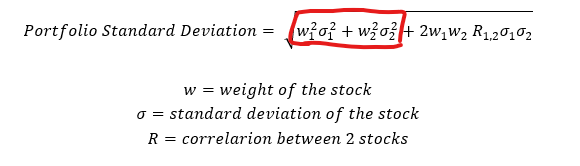
We can calculate the first term from the datafrme df_stock. We perform iteration on the df_stock dataframe. 

In [102]:
first_term_list = []

for indexes in df_stock.index:
    standard_deviation = df_stock['Standard_Deviation'][indexes]
    weight = df_stock['Weightage'][indexes]
    first_term = (standard_deviation**2)*(weight**2)
    first_term_list.append(first_term)

first_term = sum(first_term_list)
first_term

2.638109187390469e-05

#### Then, calculate the second term

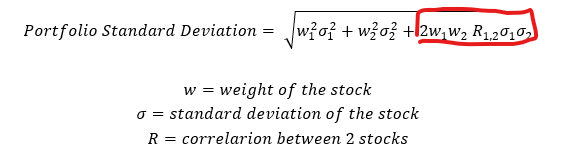

In [103]:
second_term_list = []

for indexes in df_stock_3.index:
    
    #standard deviation calculation
    weight_A = df_stock_3['Weight_Stock_A'][indexes]
    weight_B = df_stock_3['Weight_Stock_B'][indexes]
    sd_A = df_stock_3['SD_Stock_A'][indexes]
    sd_B = df_stock_3['SD_Stock_B'][indexes]
    
    #correlation calculation
    correlation = df_stock_3['Correlation'][indexes]
    
    #calculate the term
    second_term = 2*weight_A*weight_B*sd_A*sd_B*correlation
    second_term_list.append(second_term)

second_term = sum(second_term_list)
second_term

9.19027639713414e-05

#### The calculated Portfolio Standard Deviation is about 1.1%. 

In [104]:
portfolio_standard_deviation = (first_term + sd_sum_product2)**0.5
portfolio_standard_deviation

0.010862863765644768

#### Revision Notes:
- Rev.0 25/12/2022: First Version
- Rev.1 27/02/2022:
    - Include a code that updates the 'Market Value' of the portfolio
    - Clean up and optimized some of the codes

<br>

#### Future Possible Improvement / Update:
- Incorporating calculation for portfolio's Coefficient of Variation
- Tackle the issue if the portfolio contain stocks where its IPO date is later than the start date of the duration defined for standard deviation calculation.

<br>

#### Reference:

https://www.investopedia.com/terms/p/portfolio-variance.asp

https://www.wallstreetmojo.com/portfolio-standard-deviation/